Author : Russell Rupok
Department : Msc in IS student and Graduate Research Student with IDEA Lab Research Center, Athabasca University

Version: 1.0

Date: 2022/04/01 

--Project Info. 
- File No: 24697 
- Project Title: [IDEA LAB] 2022-2023 "Understanding Affordable Housing Work Roles and Representation"
- Principal Investigator: Dr. Katie MacDonald (Faculty of Humanities & Social Sciences\Centre for Interdisciplinary Studies)
- Start Date: 2022/04/01 
- Keywords: affordable housing; work; labour; representation

Background and Context: 

- Canada is in dire need of affordable housing, just over 10% of Canadian households were in “core” housing need. This means their housing needs major repairs, has insufficient bedrooms, or generally costs more than they can afford, but they cannot afford to move or can find no viable alternatives in their community. The affordable housing sector is in an exciting time of growth, but the dearth of research in this domain persists. 

Aims and Research Question(s): 

- This research project takes two of the significant challenges to the sector as sites of research. The first is workforce issues including, but not limited to, capacity, training, and retention. The second looks at representations of affordable housing in media.

- This research project will have two streams: Workforce Mapping in Affordable Housing and Understanding Responses to Affordable Housing Developments in Comparison. 

- Workforce Mapping in Affordable Housing: This stream of research asks: how are jobs in the Canadian affordable housing sector represented in job ads, and what are the key skills and abilities listed?  


Aims and Research Question(s): 
- This stream of research asks: how are jobs in the Canadian affordable housing sector represented in job ads, and what are the key skills and abilities listed?

The intention is to analyze these ads with some of these questions in mind for primary analysis:
- What are the job titles/roles that are in affordable housing providers?
- How are the jobs described?
- What are the skills or abilities needed?
- If pay ranges are provided, what are they?


--Programing Languge :
- Program is written in Python . Custom code and some python module were used

- Some Module used in modeling: 
        # Text blob : TextBlob is a Python (2 and 3) library for processing textual data. 
                        #URL : https://textblob.readthedocs.io/en/dev/index.html
    
        # Pandas : pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language.
                        #URL: https://pandas.pydata.org/
            
        # re : This module provides regular expression matching operations similar to those found in Perl.
                        #URL: https://docs.python.org/3/library/re.html
            
        # nltk : NLTK is a leading platform for building Python programs to work with human language data.
                     #URL: https://www.nltk.org/
            
        # Seaborn: Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
                    #URL: https://seaborn.pydata.org/index.html
            
        # wordcloud: Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance.
                    #URL: https://amueller.github.io/word_cloud/
        # matplotlib: Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.
                    #URL: https://matplotlib.org/

In [215]:
import textblob
import pandas as pd
import numpy as np
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import wordcloud
from wordcloud import WordCloud,STOPWORDS
from textblob import classifiers
from textblob.classifiers import NaiveBayesClassifier
from nltk import FreqDist
from collections import Counter


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rrupok\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'''As a reminder, the intention is to analyze these ads with some of these questions in mind for primary analysis:
-	What are the job titles/roles that are in affordable housing providers?
-	How are the jobs described?
-	What are the skills or abilities needed?
-	If pay ranges are provided, what are they?
'''

In [216]:
pwd

'C:\\Users\\rrupok\\Job Scrapping and Data Set Modeling\\Katie_AffordableHousing'

In [217]:
df=pd.read_excel("C:/Users/rrupok/Job Scrapping and Data Set Modeling/Katie_AffordableHousing/AffordableHousing_SampleData_8_18_2022_WithoutPivotTable.xlsx")

In [218]:
df.head()

,company,type,position,city,province,retrivaldate,posteddate,union,jobdescription,jobreq,jobdescription_benefit,jobreq_experiance_required,jobreq_degree_required,jobtype,jobterm,salary,yearlysalary
0,Individualized Funding Resource Centre Society,A,Disability Housing Service Case Management - A...,Vancouver,BC,44791.0,16 days ago,no,Are you seeking a career in the non profit sec...,requirements:\n· minimum of 2 years of related...,yes,2,high_school,fulltime,permanent,0,0
1,City of Richmond BC,B,"Manager, Affordable Housing",Richmond,BC,44791.0,30+ days ago,no,"Manager, Affordable Housing\nThe City of Richm...","knowledge, skills & abilities:\nknowledge of t...",yes,knowledge,university,fulltime,permanent,0,0
2,BC Housing,A,Supportive Housing Advisor,Vancouver,BC,44791.0,22 days ago,no,Position Summary\nSUPPORTIVE HOUSING ADVISOR\n...,candidate profile\nthe successful candidate wi...,yes,knowledge,university,fulltime,permanent,75311–85593 yearly,75311
3,BC Housing,C,Licensing Officer,Burnaby,BC,44791.0,2 days ago,no,Position Summary\nLICENSING OFFICER\nJob ID: 4...,candidate profile\nthe successful candidate wi...,yes,knowledge,college,fulltime,permanent,55324–63393 yearly,55324
4,The City of Vancouver,C,"Quality Assurance & Program Manager, Non-Marke...",Vancouver,BC,44791.0,1 day ago,no,Requisition ID: 36661\nCompany\nLocated on the...,qualifications\neducation and experience:\na d...,yes,5,university,fulltime,permanent,89283–111609 yearly,89283


In [219]:
pwd

'C:\\Users\\rrupok\\Job Scrapping and Data Set Modeling\\Katie_AffordableHousing'

In [220]:
df.info()
print("Total Rows in this dataset:",df.shape[0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   company                     244 non-null    object 
 1   type                        233 non-null    object 
 2   position                    245 non-null    object 
 3   city                        245 non-null    object 
 4   province                    245 non-null    object 
 5   retrivaldate                232 non-null    float64
 6   posteddate                  224 non-null    object 
 7   union                       185 non-null    object 
 8   jobdescription              245 non-null    object 
 9   jobreq                      244 non-null    object 
 10  jobdescription_benefit      244 non-null    object 
 11  jobreq_experiance_required  245 non-null    object 
 12  jobreq_degree_required      242 non-null    object 
 13  jobtype                     245 non

In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   company                     244 non-null    object 
 1   type                        233 non-null    object 
 2   position                    245 non-null    object 
 3   city                        245 non-null    object 
 4   province                    245 non-null    object 
 5   retrivaldate                232 non-null    float64
 6   posteddate                  224 non-null    object 
 7   union                       185 non-null    object 
 8   jobdescription              245 non-null    object 
 9   jobreq                      244 non-null    object 
 10  jobdescription_benefit      244 non-null    object 
 11  jobreq_experiance_required  245 non-null    object 
 12  jobreq_degree_required      242 non-null    object 
 13  jobtype                     245 non

In [238]:
df.describe() # Statistical observation of data on numerial columns

,retrivaldate,yearlysalary
count,232.000000,245.000000
mean,35946.314655,51761.481633
std,17364.442489,27295.567584
min,2022.000000,0.000000
25%,44791.000000,41600.000000
50%,44791.000000,51792.000000
75%,44791.000000,68093.000000
max,44824.000000,137675.000000


In [239]:
job_salary=df.groupby('type') # data set is catagoried based on the size of the organization 
job_salary.describe().head()

retrivaldate                                                        \
            count          mean           std     min      25%      50%   
type                                                                      
A            69.0  39835.536232  13794.232364  2022.0  44791.0  44791.0   
B            70.0  35634.100000  17680.089558  2022.0  44791.0  44791.0   
C            81.0  32648.567901  19406.436672  2022.0   2022.0  44791.0   

                       yearlysalary                                   \
          75%      max        count          mean           std  min   
type                                                                   
A     44791.0  44824.0         71.0  47408.971831  18639.964591  0.0   
B     44809.0  44824.0         72.0  64347.180556  33103.898918  0.0   
C     44791.0  44824.0         90.0  47363.855556  24288.867845  0.0   

                                            
           25%      50%      75%       max  
type                                        
A     41600.00  48568.0  56268.0   82900.0  
B     51034.25  70568.5  85498.5  137675.0  
C     35574.00  49626.0  64492.0   99429.0

Observation : 
    -- Job type B has the highest salary of all 

matplotlib.axes._subplots.AxesSubplot

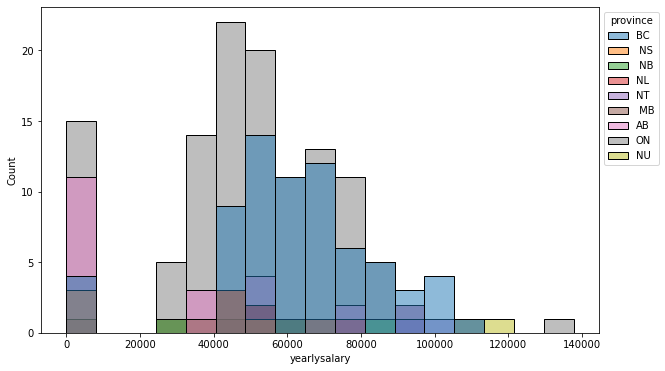

In [224]:
plt.figure(figsize=(10,6))
countplt=sns.histplot(data=job_salary.describe().head(),
                      x=df.yearlysalary,
                      hue=df.province)
sns.move_legend(countplt,"upper left",bbox_to_anchor=(1,1))
type(countplt)

Observation:
    -  This is histogram of salary based on the provinces/Teritories 
    -  There are a number of job ads donot publish the salary 
    -  Ontraio has the highest number of salary on affordable housing
    -  Job salary stays on average between 40000-80000 thousands yearly

matplotlib.axes._subplots.AxesSubplot

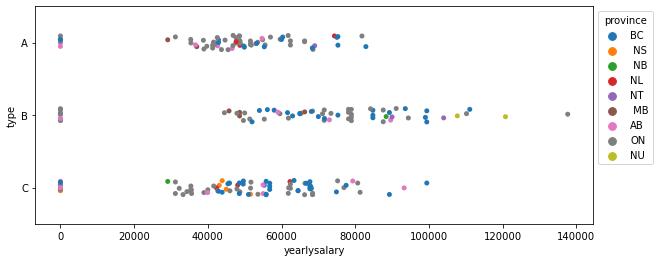

In [225]:
plt.figure(figsize=(10,4))
countplt=sns.stripplot(data=df,
                      x=df.yearlysalary,
                      y=df.type,
                      hue=df.province)
sns.move_legend(countplt,"upper left",bbox_to_anchor=(1,1))
type(countplt)

Observation :
    - This is a strip plot to find relation between Yearly salary and Type of company in terms of the province
    - We see Type B companies pay the most range is in between 45000-90000 
    

matplotlib.axes._subplots.AxesSubplot

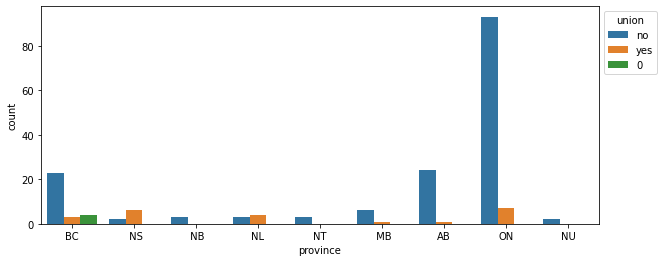

In [226]:
plt.figure(figsize=(10,4))
cntplot=sns.countplot(data=df, x=df.province,hue=df.union)
sns.move_legend(cntplot,"upper left",bbox_to_anchor=(1,1))
type(cntplot)

Observation :
    
    - This is count plot to find relationship between province and company union
    - Ontario has the least number of union altough we have a large number of the jobs in the province
    - We also Observe most of the company on any provinces are not unionized
    

matplotlib.axes._subplots.AxesSubplot

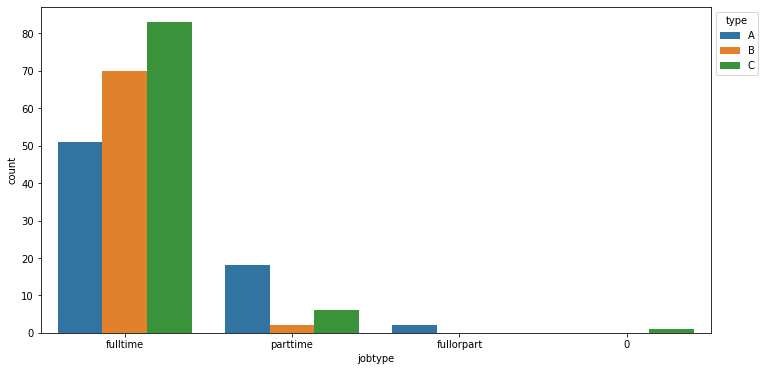

In [227]:
plt.figure(figsize=(12,6))
cntplot=sns.countplot(data=df,x=df.jobtype,hue='type')
sns.move_legend(cntplot,"upper left",bbox_to_anchor=(1,1))
type(cntplot)

Observation :
    - This is plot to find relationship between job type in terms of Company size
    - Job type : Full Time , Part Time or a job offer for full and part time both
    - We see full time job were offered the most in terms of type of the company
    - Some company also did not mention about the job type , so the job description/req is not streamlined company wide

Text(0.5, 1.0, 'Job Type Based on Provinces')

<Figure size 1152x432 with 0 Axes>

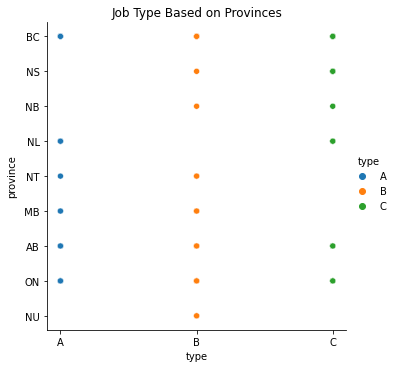

In [228]:
plt.figure(figsize=(16,6))
relplt=sns.relplot(data=df,x=df.type,y=df.province,hue=df.type)
plt.title("Job Type Based on Provinces")

Observation : We see B type company offered the most jobs

In [229]:
#countplt=sns.rugplot(data=df,x=df.type,y=df.)

seaborn.axisgrid.FacetGrid

<Figure size 1080x720 with 0 Axes>

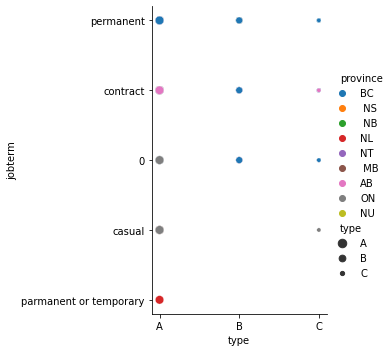

In [230]:
plt.figure(figsize=(15,10))
relplt=sns.relplot(data=df,x=df.type,y=df.jobterm,hue=df.province,size=df.type)
type(relplt)

Observation : 
    
    - Try to find relation between job type, job terms and provinces 
    - We see Type A company offering the most jobs if we take provinces as consideration

In [231]:

jobpivot=df.pivot_table(index=[df.province,df.city],values=['position'],aggfunc=[np.sum])
jobpivot.to_excel("jobpivot.xlsx")


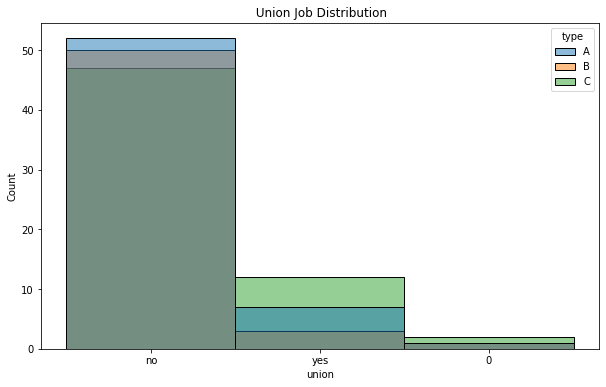

matplotlib.axes._subplots.AxesSubplot

In [232]:
plt.figure(figsize=(10,6))
histplt=sns.histplot(data=df,x=df.union,hue=df.type)
plt.title(" Union Job Distribution")
plt.show(histplt)
sns.move_legend(histplt,"upper left",bbox_to_anchor=(1,1))
type(histplt)

Observation :
    
    - This plot to represente the size of company and union representation
    - We see most company do not have any usion represent and if there is , type "B" has the highest number of union 

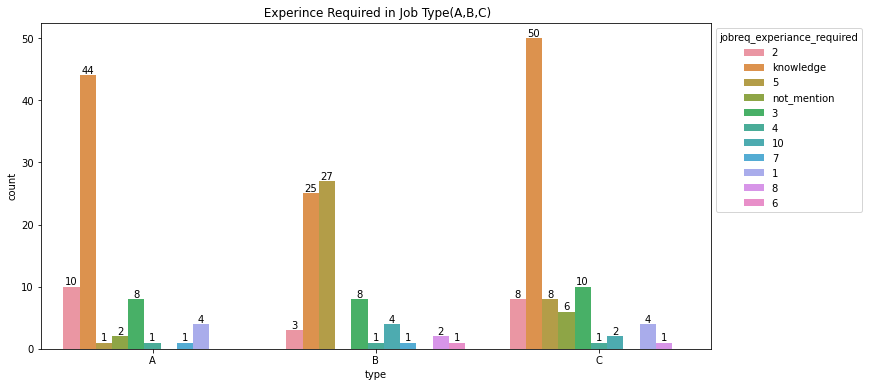

In [233]:
plt.figure(figsize=(12,6))
countplt=sns.countplot(data=df,
                       x=df.type,
                       hue=df.jobreq_experiance_required)
plt.title(" Experince Required in Job Type(A,B,C)")
sns.move_legend(countplt,"upper left",bbox_to_anchor=(1,1))
for counter in countplt.containers:
    countplt.bar_label(counter)
plt.show(countplt)

#type(relplt)

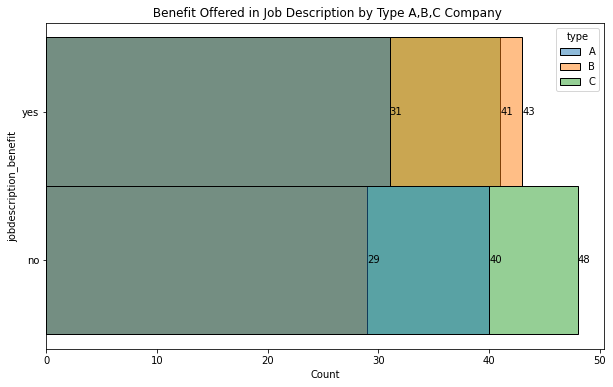

matplotlib.axes._subplots.AxesSubplot

In [235]:
plt.figure(figsize=(10,6))
histplt=sns.histplot(data=df,y=df.jobdescription_benefit,hue=df.type)
for counter in histplt.containers:
    histplt.bar_label(counter)
plt.title(" Benefit Offered in Job Description by Type A,B,C Company")
plt.show(histplt)
sns.move_legend(histplt,"upper left",bbox_to_anchor=(1,1))
type(histplt)

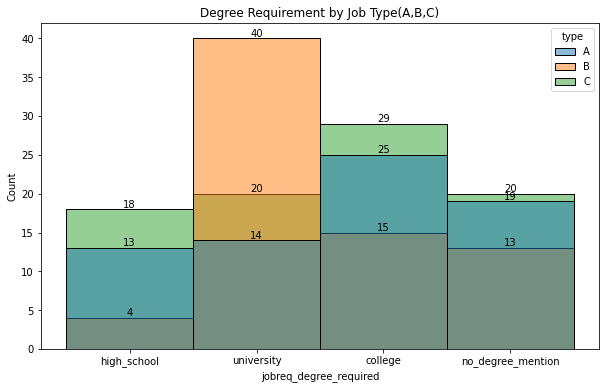

In [236]:
plt.figure(figsize=(10,6))
histplt=sns.histplot(data=df,x=df.jobreq_degree_required,hue=df.type)
for counter in histplt.containers:
    histplt.bar_label(counter)
plt.title("Degree Requirement by Job Type(A,B,C)")
plt.show(histplt)

In [214]:
df.isnull()

,company,type,position,city,province,retrivaldate,posteddate,union,jobdescription,jobreq,jobdescription_benefit,jobreq_experiance_required,jobreq_degree_required,jobtype,jobterm,salary,yearlysalary
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False
241,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
242,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
243,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [57]:
def lowertext(text):
    lower_case=' '.join(text.lower())
    return lower_case

df['jobreq_lower']=df['jobreq'].dropna().apply(lambda x:lowertext(x) if type('jobreq')==str else False)
df.head(5)

,company,type,position,city,province,retrivaldate,posteddate,union,jobdescription,jobreq,jobdescription_benefit,jobreq_experiance_required,jobreq_degree_required,jobtype,jobterm,salary,yearlysalary,jobreq_lower
0,Individualized Funding Resource Centre Society,A,Disability Housing Service Case Management - A...,Vancouver,BC,2022-08-18 00:00:00,16 days ago,no,Are you seeking a career in the non profit sec...,requirements:\n· minimum of 2 years of related...,yes,2,high_school,fulltime,permanent,0,0,r e q u i r e m e n t s : \n · m i n i m u m...
1,City of Richmond BC,B,"Manager, Affordable Housing",Richmond,BC,2022-08-18 00:00:00,30+ days ago,no,"Manager, Affordable Housing\nThe City of Richm...","knowledge, skills & abilities:\nknowledge of t...",yes,knowledge,university,fulltime,permanent,0,0,"k n o w l e d g e , s k i l l s & a b i ..."
2,BC Housing,A,Supportive Housing Advisor,Vancouver,BC,2022-08-18 00:00:00,22 days ago,no,Position Summary\nSUPPORTIVE HOUSING ADVISOR\n...,candidate profile\nthe successful candidate wi...,yes,knowledge,university,fulltime,permanent,75311–85593 yearly,75311,c a n d i d a t e p r o f i l e \n t h e s...
3,BC Housing,C,Licensing Officer,Burnaby,BC,2022-08-18 00:00:00,2 days ago,no,Position Summary\nLICENSING OFFICER\nJob ID: 4...,candidate profile\nthe successful candidate wi...,yes,knowledge,college,fulltime,permanent,55324–63393 yearly,55324,c a n d i d a t e p r o f i l e \n t h e s...
4,The City of Vancouver,C,"Quality Assurance & Program Manager, Non-Marke...",Vancouver,BC,2022-08-18 00:00:00,1 day ago,no,Requisition ID: 36661\nCompany\nLocated on the...,qualifications\neducation and experience:\na d...,yes,5,university,fulltime,permanent,89283–111609 yearly,89283,q u a l i f i c a t i o n s \n e d u c a t i o...


In [58]:
def remove_punctuation(txt):
    text_nopunt="".join([c for c in txt if c not in string.punctuation])
    return text_nopunt

df["jobreq_lower_nopunc"]=df["jobreq_lower"].dropna().apply(lambda x:remove_punctuation(x))
df.head(5)



,company,type,position,city,province,retrivaldate,posteddate,union,jobdescription,jobreq,jobdescription_benefit,jobreq_experiance_required,jobreq_degree_required,jobtype,jobterm,salary,yearlysalary,jobreq_lower,jobreq_lower_nopunc
0,Individualized Funding Resource Centre Society,A,Disability Housing Service Case Management - A...,Vancouver,BC,2022-08-18 00:00:00,16 days ago,no,Are you seeking a career in the non profit sec...,requirements:\n· minimum of 2 years of related...,yes,2,high_school,fulltime,permanent,0,0,r e q u i r e m e n t s : \n · m i n i m u m...,r e q u i r e m e n t s \n · m i n i m u m ...
1,City of Richmond BC,B,"Manager, Affordable Housing",Richmond,BC,2022-08-18 00:00:00,30+ days ago,no,"Manager, Affordable Housing\nThe City of Richm...","knowledge, skills & abilities:\nknowledge of t...",yes,knowledge,university,fulltime,permanent,0,0,"k n o w l e d g e , s k i l l s & a b i ...",k n o w l e d g e s k i l l s a b i l ...
2,BC Housing,A,Supportive Housing Advisor,Vancouver,BC,2022-08-18 00:00:00,22 days ago,no,Position Summary\nSUPPORTIVE HOUSING ADVISOR\n...,candidate profile\nthe successful candidate wi...,yes,knowledge,university,fulltime,permanent,75311–85593 yearly,75311,c a n d i d a t e p r o f i l e \n t h e s...,c a n d i d a t e p r o f i l e \n t h e s...
3,BC Housing,C,Licensing Officer,Burnaby,BC,2022-08-18 00:00:00,2 days ago,no,Position Summary\nLICENSING OFFICER\nJob ID: 4...,candidate profile\nthe successful candidate wi...,yes,knowledge,college,fulltime,permanent,55324–63393 yearly,55324,c a n d i d a t e p r o f i l e \n t h e s...,c a n d i d a t e p r o f i l e \n t h e s...
4,The City of Vancouver,C,"Quality Assurance & Program Manager, Non-Marke...",Vancouver,BC,2022-08-18 00:00:00,1 day ago,no,Requisition ID: 36661\nCompany\nLocated on the...,qualifications\neducation and experience:\na d...,yes,5,university,fulltime,permanent,89283–111609 yearly,89283,q u a l i f i c a t i o n s \n e d u c a t i o...,q u a l i f i c a t i o n s \n e d u c a t i o...


In [60]:
def jobword_count(str):
    counts = dict()
    words = str.split()

    for i in words:
        if i in counts:
            counts[i] += 1
        else:
            counts[i] = 1

    return counts

df["jobreq_wordfreq"]=df["jobreq"].dropna().apply(lambda x:jobword_count(x))
df.head(5)


,company,type,position,city,province,retrivaldate,posteddate,union,jobdescription,jobreq,jobdescription_benefit,jobreq_experiance_required,jobreq_degree_required,jobtype,jobterm,salary,yearlysalary,jobreq_lower,jobreq_lower_nopunc,jobreq_wordfreq
0,Individualized Funding Resource Centre Society,A,Disability Housing Service Case Management - A...,Vancouver,BC,2022-08-18 00:00:00,16 days ago,no,Are you seeking a career in the non profit sec...,requirements:\n· minimum of 2 years of related...,yes,2,high_school,fulltime,permanent,0,0,r e q u i r e m e n t s : \n · m i n i m u m...,r e q u i r e m e n t s \n · m i n i m u m ...,"{'requirements:': 1, '·': 14, 'minimum': 1, 'o..."
1,City of Richmond BC,B,"Manager, Affordable Housing",Richmond,BC,2022-08-18 00:00:00,30+ days ago,no,"Manager, Affordable Housing\nThe City of Richm...","knowledge, skills & abilities:\nknowledge of t...",yes,knowledge,university,fulltime,permanent,0,0,"k n o w l e d g e , s k i l l s & a b i ...",k n o w l e d g e s k i l l s a b i l ...,"{'knowledge,': 1, 'skills': 2, '&': 1, 'abilit..."
2,BC Housing,A,Supportive Housing Advisor,Vancouver,BC,2022-08-18 00:00:00,22 days ago,no,Position Summary\nSUPPORTIVE HOUSING ADVISOR\n...,candidate profile\nthe successful candidate wi...,yes,knowledge,university,fulltime,permanent,75311–85593 yearly,75311,c a n d i d a t e p r o f i l e \n t h e s...,c a n d i d a t e p r o f i l e \n t h e s...,"{'candidate': 2, 'profile': 1, 'the': 16, 'suc..."
3,BC Housing,C,Licensing Officer,Burnaby,BC,2022-08-18 00:00:00,2 days ago,no,Position Summary\nLICENSING OFFICER\nJob ID: 4...,candidate profile\nthe successful candidate wi...,yes,knowledge,college,fulltime,permanent,55324–63393 yearly,55324,c a n d i d a t e p r o f i l e \n t h e s...,c a n d i d a t e p r o f i l e \n t h e s...,"{'candidate': 2, 'profile': 2, 'the': 14, 'suc..."
4,The City of Vancouver,C,"Quality Assurance & Program Manager, Non-Marke...",Vancouver,BC,2022-08-18 00:00:00,1 day ago,no,Requisition ID: 36661\nCompany\nLocated on the...,qualifications\neducation and experience:\na d...,yes,5,university,fulltime,permanent,89283–111609 yearly,89283,q u a l i f i c a t i o n s \n e d u c a t i o...,q u a l i f i c a t i o n s \n e d u c a t i o...,"{'qualifications': 1, 'education': 2, 'and': 5..."


In [61]:
stop_words = stopwords.words('english')
new_stopwords = ["all", "due", "to", "on","monkey" ,
                 "daily","dtype","ex","di","qualifications","candidate","jobreq_withoutstopword",
                "related","ca","name","someone","profile","following","public",
                "required","requirements","e","education",'2nd',"successful",
                 "length","minimum","object","years","knowledge","abilities","skills","year"]
stop_words.extend(new_stopwords)
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [62]:

df['jobreq_withoutstopword'] = df['jobreq_wordfreq'].dropna().apply(lambda x: [item for item in x if item not in stop_words])
df.head(5)
#df.shape[0]

,company,type,position,city,province,retrivaldate,posteddate,union,jobdescription,jobreq,...,jobreq_experiance_required,jobreq_degree_required,jobtype,jobterm,salary,yearlysalary,jobreq_lower,jobreq_lower_nopunc,jobreq_wordfreq,jobreq_withoutstopword
0,Individualized Funding Resource Centre Society,A,Disability Housing Service Case Management - A...,Vancouver,BC,2022-08-18 00:00:00,16 days ago,no,Are you seeking a career in the non profit sec...,requirements:\n· minimum of 2 years of related...,...,2,high_school,fulltime,permanent,0,0,r e q u i r e m e n t s : \n · m i n i m u m...,r e q u i r e m e n t s \n · m i n i m u m ...,"{'requirements:': 1, '·': 14, 'minimum': 1, 'o...","[requirements:, ·, 2, experience, non-profit, ..."
1,City of Richmond BC,B,"Manager, Affordable Housing",Richmond,BC,2022-08-18 00:00:00,30+ days ago,no,"Manager, Affordable Housing\nThe City of Richm...","knowledge, skills & abilities:\nknowledge of t...",...,knowledge,university,fulltime,permanent,0,0,"k n o w l e d g e , s k i l l s & a b i ...",k n o w l e d g e s k i l l s a b i l ...,"{'knowledge,': 1, 'skills': 2, '&': 1, 'abilit...","[knowledge,, &, abilities:, affordable, housin..."
2,BC Housing,A,Supportive Housing Advisor,Vancouver,BC,2022-08-18 00:00:00,22 days ago,no,Position Summary\nSUPPORTIVE HOUSING ADVISOR\n...,candidate profile\nthe successful candidate wi...,...,knowledge,university,fulltime,permanent,75311–85593 yearly,75311,c a n d i d a t e p r o f i l e \n t h e s...,c a n d i d a t e p r o f i l e \n t h e s...,"{'candidate': 2, 'profile': 1, 'the': 16, 'suc...","[following:, &, experience:, bachelor’s, degre..."
3,BC Housing,C,Licensing Officer,Burnaby,BC,2022-08-18 00:00:00,2 days ago,no,Position Summary\nLICENSING OFFICER\nJob ID: 4...,candidate profile\nthe successful candidate wi...,...,knowledge,college,fulltime,permanent,55324–63393 yearly,55324,c a n d i d a t e p r o f i l e \n t h e s...,c a n d i d a t e p r o f i l e \n t h e s...,"{'candidate': 2, 'profile': 2, 'the': 14, 'suc...","[following:, &, experience:, college, diploma,..."
4,The City of Vancouver,C,"Quality Assurance & Program Manager, Non-Marke...",Vancouver,BC,2022-08-18 00:00:00,1 day ago,no,Requisition ID: 36661\nCompany\nLocated on the...,qualifications\neducation and experience:\na d...,...,5,university,fulltime,permanent,89283–111609 yearly,89283,q u a l i f i c a t i o n s \n e d u c a t i o...,q u a l i f i c a t i o n s \n e d u c a t i o...,"{'qualifications': 1, 'education': 2, 'and': 5...","[experience:, degree, administration,, urban, ..."


In [63]:
def jobword_count(str):
    counts = dict()
    words = str.split()

    for i in words:
        if i in counts:
            counts[i] += 1
        else:
            counts[i] = 1

    return counts

df["jobdescription_wordfreq"]=df["jobdescription"].dropna().apply(lambda x:jobword_count(x))
df.head(5)


,company,type,position,city,province,retrivaldate,posteddate,union,jobdescription,jobreq,...,jobreq_degree_required,jobtype,jobterm,salary,yearlysalary,jobreq_lower,jobreq_lower_nopunc,jobreq_wordfreq,jobreq_withoutstopword,jobdescription_wordfreq
0,Individualized Funding Resource Centre Society,A,Disability Housing Service Case Management - A...,Vancouver,BC,2022-08-18 00:00:00,16 days ago,no,Are you seeking a career in the non profit sec...,requirements:\n· minimum of 2 years of related...,...,high_school,fulltime,permanent,0,0,r e q u i r e m e n t s : \n · m i n i m u m...,r e q u i r e m e n t s \n · m i n i m u m ...,"{'requirements:': 1, '·': 14, 'minimum': 1, 'o...","[requirements:, ·, 2, experience, non-profit, ...","{'Are': 2, 'you': 6, 'seeking': 1, 'a': 13, 'c..."
1,City of Richmond BC,B,"Manager, Affordable Housing",Richmond,BC,2022-08-18 00:00:00,30+ days ago,no,"Manager, Affordable Housing\nThe City of Richm...","knowledge, skills & abilities:\nknowledge of t...",...,university,fulltime,permanent,0,0,"k n o w l e d g e , s k i l l s & a b i ...",k n o w l e d g e s k i l l s a b i l ...,"{'knowledge,': 1, 'skills': 2, '&': 1, 'abilit...","[knowledge,, &, abilities:, affordable, housin...","{'Manager,': 2, 'Affordable': 6, 'Housing': 6,..."
2,BC Housing,A,Supportive Housing Advisor,Vancouver,BC,2022-08-18 00:00:00,22 days ago,no,Position Summary\nSUPPORTIVE HOUSING ADVISOR\n...,candidate profile\nthe successful candidate wi...,...,university,fulltime,permanent,75311–85593 yearly,75311,c a n d i d a t e p r o f i l e \n t h e s...,c a n d i d a t e p r o f i l e \n t h e s...,"{'candidate': 2, 'profile': 1, 'the': 16, 'suc...","[following:, &, experience:, bachelor’s, degre...","{'Position': 1, 'Summary': 1, 'SUPPORTIVE': 2,..."
3,BC Housing,C,Licensing Officer,Burnaby,BC,2022-08-18 00:00:00,2 days ago,no,Position Summary\nLICENSING OFFICER\nJob ID: 4...,candidate profile\nthe successful candidate wi...,...,college,fulltime,permanent,55324–63393 yearly,55324,c a n d i d a t e p r o f i l e \n t h e s...,c a n d i d a t e p r o f i l e \n t h e s...,"{'candidate': 2, 'profile': 2, 'the': 14, 'suc...","[following:, &, experience:, college, diploma,...","{'Position': 1, 'Summary': 1, 'LICENSING': 2, ..."
4,The City of Vancouver,C,"Quality Assurance & Program Manager, Non-Marke...",Vancouver,BC,2022-08-18 00:00:00,1 day ago,no,Requisition ID: 36661\nCompany\nLocated on the...,qualifications\neducation and experience:\na d...,...,university,fulltime,permanent,89283–111609 yearly,89283,q u a l i f i c a t i o n s \n e d u c a t i o...,q u a l i f i c a t i o n s \n e d u c a t i o...,"{'qualifications': 1, 'education': 2, 'and': 5...","[experience:, degree, administration,, urban, ...","{'Requisition': 1, 'ID:': 1, '36661': 1, 'Comp..."


In [64]:
stop_words = stopwords.words('english')
new_stopwords = ["all", "due", "to", "on","monkey" ,
                 "daily","dtype","ex","di","qualifications","candidate","jobreq_withoutstopword",
                "related","ca","name","someone","profile","following","public",
                "required","requirements","e","education",'2nd',"successful",
                 "length","minimum","object","years","knowledge","abilities","skills","year"]
stop_words.extend(new_stopwords)
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [65]:
df['jobreq_withoutstopword'] = df['jobreq_wordfreq'].dropna().apply(lambda x: [item for item in x if item not in stop_words])
df.head(5)

,company,type,position,city,province,retrivaldate,posteddate,union,jobdescription,jobreq,...,jobreq_degree_required,jobtype,jobterm,salary,yearlysalary,jobreq_lower,jobreq_lower_nopunc,jobreq_wordfreq,jobreq_withoutstopword,jobdescription_wordfreq
0,Individualized Funding Resource Centre Society,A,Disability Housing Service Case Management - A...,Vancouver,BC,2022-08-18 00:00:00,16 days ago,no,Are you seeking a career in the non profit sec...,requirements:\n· minimum of 2 years of related...,...,high_school,fulltime,permanent,0,0,r e q u i r e m e n t s : \n · m i n i m u m...,r e q u i r e m e n t s \n · m i n i m u m ...,"{'requirements:': 1, '·': 14, 'minimum': 1, 'o...","[requirements:, ·, 2, experience, non-profit, ...","{'Are': 2, 'you': 6, 'seeking': 1, 'a': 13, 'c..."
1,City of Richmond BC,B,"Manager, Affordable Housing",Richmond,BC,2022-08-18 00:00:00,30+ days ago,no,"Manager, Affordable Housing\nThe City of Richm...","knowledge, skills & abilities:\nknowledge of t...",...,university,fulltime,permanent,0,0,"k n o w l e d g e , s k i l l s & a b i ...",k n o w l e d g e s k i l l s a b i l ...,"{'knowledge,': 1, 'skills': 2, '&': 1, 'abilit...","[knowledge,, &, abilities:, affordable, housin...","{'Manager,': 2, 'Affordable': 6, 'Housing': 6,..."
2,BC Housing,A,Supportive Housing Advisor,Vancouver,BC,2022-08-18 00:00:00,22 days ago,no,Position Summary\nSUPPORTIVE HOUSING ADVISOR\n...,candidate profile\nthe successful candidate wi...,...,university,fulltime,permanent,75311–85593 yearly,75311,c a n d i d a t e p r o f i l e \n t h e s...,c a n d i d a t e p r o f i l e \n t h e s...,"{'candidate': 2, 'profile': 1, 'the': 16, 'suc...","[following:, &, experience:, bachelor’s, degre...","{'Position': 1, 'Summary': 1, 'SUPPORTIVE': 2,..."
3,BC Housing,C,Licensing Officer,Burnaby,BC,2022-08-18 00:00:00,2 days ago,no,Position Summary\nLICENSING OFFICER\nJob ID: 4...,candidate profile\nthe successful candidate wi...,...,college,fulltime,permanent,55324–63393 yearly,55324,c a n d i d a t e p r o f i l e \n t h e s...,c a n d i d a t e p r o f i l e \n t h e s...,"{'candidate': 2, 'profile': 2, 'the': 14, 'suc...","[following:, &, experience:, college, diploma,...","{'Position': 1, 'Summary': 1, 'LICENSING': 2, ..."
4,The City of Vancouver,C,"Quality Assurance & Program Manager, Non-Marke...",Vancouver,BC,2022-08-18 00:00:00,1 day ago,no,Requisition ID: 36661\nCompany\nLocated on the...,qualifications\neducation and experience:\na d...,...,university,fulltime,permanent,89283–111609 yearly,89283,q u a l i f i c a t i o n s \n e d u c a t i o...,q u a l i f i c a t i o n s \n e d u c a t i o...,"{'qualifications': 1, 'education': 2, 'and': 5...","[experience:, degree, administration,, urban, ...","{'Requisition': 1, 'ID:': 1, '36661': 1, 'Comp..."


In [66]:
df.shape[0]


245

In [67]:
df.to_excel("wordonly.xlsx")

In [68]:
stop_words = stopwords.words('english')
new_stopwords = ["all", "due", "to", "on","monkey" ,
                 "daily","dtype","ex","di","qualifications","candidate","jobreq_withoutstopword",
                "related","ca","name","someone","profile","following","public",
                "required","requirements","e","education",'2nd',"successful",
                 "length","minimum","object","years","knowledge","abilities","skills","year"]
stop_words.extend(new_stopwords)
#print(stop_words)

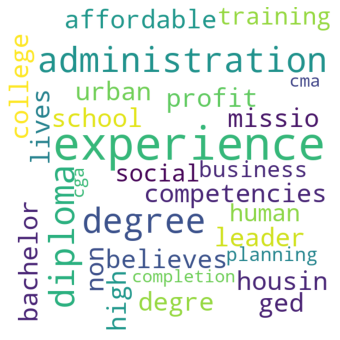

In [69]:

text="".join(str(df['jobreq_withoutstopword']))
#wordcloud = WordCloud(stopwords=nltk.corpus.stopwords.words('english'),height=600,width=600,max_words=100, background_color="white").generate(text)
wordcloud = WordCloud(stopwords=stop_words,height=600,width=600,max_words=100, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure(figsize=[6,6])
plt.imshow(wordcloud, interpolation='kaiser')
plt.axis("off")
plt.show()

In [70]:
#df['jobdes_withoutstopword'] = df['jobdescription'].dropna().apply(lambda x: [item for item in x if item not in stop_words])
#df.head(5)

In [71]:
#def lowertext(text):
    #lower_case=' '.join(text.lower())
    #return lower_case

#df['jobdes_lower']=df['jobdescription'].dropna().apply(lambda x:lowertext(x) if type('jobreq')==str else False)
#df.head(5)

In [72]:
#stop_words = stopwords.words('english')
#new_stopwords = df['jobreq_withoutstopword']
#stop_words.extend(new_stopwords)
#print(stop_words)

In [73]:
stop_words = stopwords.words('english')
new_stopwords = ["all", "due", "to", "on" ,"daily",
                 "within","issue","related",
                 "application","applicant",
                 "including","required","well","need","issues",
                "requirement","requirements","procedure","education"]
stop_words.extend(new_stopwords)
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

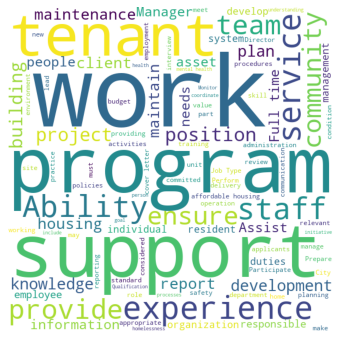

In [74]:

#text1="".join(str(df['jobdes_lower']))
text1="".join(df['jobdescription'])
#wordcloud = WordCloud(stopwords=nltk.corpus.stopwords.words('english'),height=600,width=600,max_words=100, background_color="white").generate(text)
wordcloud = WordCloud(stopwords=stop_words,height=600,width=600,max_words=100, background_color="white").generate(text1)
# Display the generated image:
# the matplotlib way:
plt.figure(figsize=[6,6])
plt.imshow(wordcloud, interpolation='kaiser')
plt.axis("off")
plt.show(wordcloud)
#wordcloud.to_file("job_description.png")